<a href="https://colab.research.google.com/github/abdulloyev/DataScientis-openSource/blob/main/Topshiriq%20%231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  MUSTAQIL ISH №1
---
## ***Abdulloyev Ulug'bek*** `204-guruh`
### *Regressiya algoritmlari asosida ma’lumotlarni tahlil qilish*




# Kerakli kutubxonalar ro'yhati

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt

# Ma'lumotlarni Yig'ib o'qib olamiz

In [ ]:
# Fayilni linki `Uy_bazasi_2`
file_link = "https://drive.google.com/uc?export=download&id=1wUQ1aMqcAToyCjpa0J8LCn_Owa3VVp3J" # Eng

In [ ]:
# failni Googleshets dan o'qib olamiz
df = pd.read_csv(file_link)

Nima uchun `index`larni `index_col=` deb olmadik?
Sabab shundaki bizning `df` da unikal nomlar yoq, yani ustunlardagi qiymatlar hech bo'lmaganda ikki marta takrorlangan

In [ ]:
# tasodifiy 4 ta satrni ko'ramiz
df.sample(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2317,-119.67,36.89,15,2373,364.0,1280,386,5.3080,INLAND,167500
12849,-121.39,38.69,38,300,47.0,154,51,4.0909,INLAND,108300
12708,-121.38,38.59,36,1239,237.0,764,222,3.0156,INLAND,103000
19375,-120.86,37.73,27,508,93.0,263,81,3.1136,INLAND,183300


# Ma'lumotlarni tahlil qilib olamiz

`df` haqidagi bir nechta malumotlarni olmiz `.info()` yordamida

---

Bundan ko'rinib turibdiki bizda 10 ta ustun va 20640 ta satr mavjud ekan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


Ustunimizdagi bo'sh qiymatlarni tekshirib olamiz, `isnull()` yordamida va `sum()` yordamida ularni sanab ham olamiz

---

`df` da bitta ustunimizda `total_bedrooms` - `jami_yotoqxonalar` ustunida `207` ta bo'sh ustun aniqladik, bu bizni modulimizni baholashini pasaytirib yuboradi

In [ ]:
# ustundagi NaN qiymatlar soni
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


Ho'sh buni nima qilamiz? Bu ustundagi `207` ta satrni o'rtacha `mean()` qiymatlar bilan to'ldirib chiqamiz.

---

Natijani qaytib tekshiramiz

In [ ]:
# NaN qiymatlarni to'ldirish
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

<ipython-input-43-d67c8104f50d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


Va man bizda hech qanday `NaN` qiymatga ega ustunlarimi qolmadi, bu qilgan ishimiz sal bo'lsa ham hatolardan (kamchiliklardan) qochishga yordam beradi.

In [ ]:
# ustundagi NaN qiymatlar sonini qayta tekshiramiz
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


# Encoder
---
Endi `Encoder` yordamida `object` typega tegishli ustunlarimizni ham raqam ko'rinishiga o'tgazib olamiz, Raqamlar bilan ishlash bizga juda yaxshi qo'l keladi.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df["ocean_proximity"].values)

Biz yuqorida `df.info()` df haqidagi barcha malumotlarni ko'rganimizda faqatkina 1 ta ustinimiz `object` ustunga ega edi.

In [ ]:
df.sample(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8388,-118.37,33.97,26,6672,1729.0,3333,1557,2.9646,0,179800
4576,-118.28,34.07,24,3247,1281.0,2642,1182,2.4632,0,216700
12358,-116.54,33.79,18,9374,1780.0,1678,919,3.9737,1,235600
5163,-118.29,33.96,39,1340,409.0,1463,367,1.5294,0,111400


# Korrelyatsion Tahlil va normallashtirish

Endi uyning `median_house_value` - `Narxini` ga boshqa ustunlarning ahamiyatini (tasirini) ko'rib chiqamiz.

In [ ]:
df.corrwith(df["median_house_value"])
# manfiy qiymatlarga etibor bering

# M: -0.144160 bu shuni anglatadiki, kenglik (latitude) ortgani sayin uyning median qiymati (median_house_value) biroz kamayadi.

,0
longitude,-0.045967
latitude,-0.144160
housing_median_age,0.105623
total_rooms,0.134153
total_bedrooms,0.049454
population,-0.024650
households,0.065843
median_income,0.688075
ocean_proximity,0.081750
median_house_value,1.000000


So'ngra bizni modelga unchalik tasir qilmaydigan ustunlarni olib tashlasak ham bo'ladi

In [ ]:
# 0.05 da katta ustunlar dataga katta tasir qiladi, shuning uchun ularni olib qolamiz

df.drop("longitude", axis=1, inplace=True)
df.drop("latitude", axis=1, inplace=True)
df.drop("total_bedrooms", axis=1, inplace=True)
df.drop("population", axis=1, inplace=True)
df.drop("households", axis=1, inplace=True)

In [ ]:
df.sample(5)

,housing_median_age,total_rooms,median_income,ocean_proximity,median_house_value
4032,25,3352,2.8528,0,425000
1180,14,1724,2.4952,1,53900
248,50,1776,1.7276,3,102300
13831,9,5756,5.5875,1,167800
6278,19,1129,3.8750,0,135600


In [ ]:
df.corrwith(df["median_house_value"])

,0
housing_median_age,0.105623
total_rooms,0.134153
median_income,0.688075
ocean_proximity,0.081750
median_house_value,1.000000


# `X` va `Y` ni aniqlab olish.

* X – mustaqil o'zgaruvchilar (uy xususiyatlari).

* y – bog'liq o'zgaruvchi (natija, ya'ni narx).

* X va y ni ajratish mashina o'rganish modelini o'rgatish uchun zarur.

In [ ]:
# `median_house_value` tashqari barcha ustunlarni oladi
X = df.drop("median_house_value", axis=1)

y = df["median_house_value"]

In [ ]:
# Natijalarni ko'ramiz
X.head()

,housing_median_age,total_rooms,median_income,ocean_proximity
0,41,880,8.3252,3
1,21,7099,8.3014,3
2,52,1467,7.2574,3
3,52,1274,5.6431,3
4,52,1627,3.8462,3


In [ ]:
y.head()

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200


# Test va o’quv to’plamlariga bo’lish

* **Trenirovka ma'lumotlari** modelni o'rgatish uchun ishlatiladi.

* **Test ma'lumotlari** modelning yangi ma'lumotlarga qanday ishlashini sinash uchun ishlatiladi.

* Bu jarayon modelning haqiqiy dunyoda qanday ishlashini baholash uchun juda muhim.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,housing_median_age,total_rooms,median_income,ocean_proximity
14196,33,3126,3.2596,4
8267,49,3382,3.8125,4
17445,4,1897,4.1563,4
14265,36,1421,1.9425,4
2271,43,2382,3.5542,1


# Standartlashtirish (Scaling)

* **Standardlashdirish** ma'lumotlarni bir xil shkalaga keltiradi.

* Bu modelning tezroq va aniqroq o'rganishiga yordam beradi.

* Trenirovka ma'lumotlari uchun `fit_transform`, test ma'lumotlari uchun esa `transform` ishlatiladi.

Ma'lumotlardagi ustunlar (features) turli xil shkalada bo'lishi mumkin. Masalan:

* Bir ustun 0 dan 100 gacha qiymatlarga ega.

* Ikkinchi ustun 0 dan 1 000 000 gacha qiymatlarga ega.

Agar shkalalar juda farq qilsa, mashina o'rganish modellari katta qiymatlarga ko'proq e'tibor berishi mumkin, bu esa modelning ishlashiga salbiy ta'sir ko'rsatadi. Standardlashdirish bu muammoni hal qiladi.


* `fit_transform` - bu bir vaqatninh o'zida `fit`- o'rtacha qiymatlarini topamiz va `transform` - bu faqat bizga kelgan ma'lumotlarni transform qilib olamiz

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit_transform faqat trenirovka ma'lumotlari uchun ishlatiladi,
# chunki u ma'lumotlarni o'rganadi va transformatsiya qiladi.
X_train = scaler.fit_transform(X_train)

# transform test ma'lumotlari uchun ishlatiladi,
# chunki ular trenirovka ma'lumotlari asosida transformatsiya qilinadi.
X_test = scaler.transform(X_test)

# Multiple regressiya

In [ ]:
# modelni yaratib olamiz
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Model mustaqil o'zgaruvchilar va bog'liq o'zgaruvchi o'rtasidagi bog'liqlikni o'rganadi.

In [ ]:
# madelni o'qitibolamiz - training
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Bashorat qilish - prediction

y_pred = model.predict(X_test) # test ma'lumotlari uchun bashorat qilingan qiymatlar

In [ ]:
# Modelni baholash
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'MAE: {MAE}, RMSE: {RMSE}, R^2: {r2}')

MAE: 59694.927520438316, RMSE: 80428.81670413697, R^2: 0.5063530039979269


# Polinomli regressiya

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dataning tuzilishini ko‘rish
df.info()  # Ustunlar haqida ma'lumot


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  int64  
 1   total_rooms         20640 non-null  int64  
 2   median_income       20640 non-null  float64
 3   ocean_proximity     20640 non-null  int64  
 4   median_house_value  20640 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 806.4 KB


`X` va `y` qiymatlarni aniqlashtirib olishimiz kerak

`X` ustunning `NaN` qiymat bor yo'qligini tekshiramiz

In [ ]:
# Maqsadli o'zgaruvchi (y)
y = df["median_house_value"]

# Mustaqil o'zgaruvchilar (X) — "median_house_value" ustunidan tashqari hamma ustunlar
X = df.drop(columns=["median_house_value"])

# NaN qiymatlar bormi
X.isnull().sum()  # Agar mavjud bo'lsa tozalash kerak

,0
housing_median_age,0
total_rooms,0
median_income,0
ocean_proximity,0


NaN qiymatlarni ustunning o'rtacha qiymati bilan to'ldirish

In [ ]:
X = X.fillna(X.mean())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X o'zgaruvchilarga polinom transformatsiya qo'llash

In [ ]:
degree = 2  # Polinom darajasi
poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Modelni yaratib olamiz

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)

> O'rtacha absolyut xato

> Kvadrat ildiz o'rtacha xatolik

> Modelning aniqlik darajasi

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 52972.52418206974
RMSE: 73524.52301999553
R^2: 0.5874680672155725


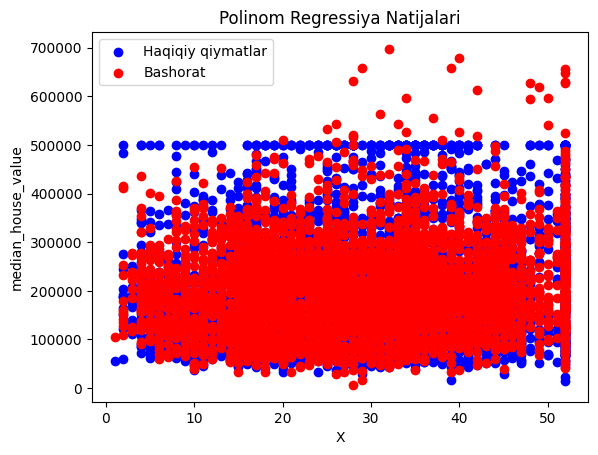

In [ ]:
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Haqiqiy qiymatlar')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Bashorat')
plt.xlabel("X")
plt.ylabel("median_house_value")
plt.title("Polinom Regressiya Natijalari")
plt.legend()
plt.show()

In [ ]:
!jupyter nbconvert --to html /content/Topshiriq_1.ipynb

[NbConvertApp] Converting notebook /content/Topshiriq_1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 485305 bytes to /content/Topshiriq_1.html
